In [50]:
import pandas as pd
import sklearn
import os
import matplotlib as mpl
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [51]:
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

vd = df_cases[['age','sex','height','weight','bmi']]
vd

,age,sex,height,weight,bmi
0,77.0,M,160.2,67.50,26.3
1,54.0,M,167.3,54.80,19.6
2,62.0,M,169.1,69.70,24.4
3,74.0,M,160.6,53.00,20.5
4,66.0,M,171.0,59.70,20.4
...,...,...,...,...,...
6383,64.0,M,161.5,63.00,24.2
6384,69.0,M,159.3,62.30,24.6
6385,61.0,F,151.7,43.25,18.8
6386,24.0,F,155.7,55.50,22.9


In [76]:
bmi_stats = vd[["weight", 'height', 'bmi', 'age']]
bmi_stats

,weight,height,bmi,age
0,67.50,160.2,26.3,77.0
1,54.80,167.3,19.6,54.0
2,69.70,169.1,24.4,62.0
3,53.00,160.6,20.5,74.0
4,59.70,171.0,20.4,66.0
...,...,...,...,...
6383,63.00,161.5,24.2,64.0
6384,62.30,159.3,24.6,69.0
6385,43.25,151.7,18.8,61.0
6386,55.50,155.7,22.9,24.0


In [77]:
import numpy as np

X = np.c_[bmi_stats["weight"]]
y = np.c_[bmi_stats["bmi"]]

X, y

(array([[77.],
        [54.],
        [62.],
        ...,
        [61.],
        [24.],
        [47.]]),
 array([[26.3],
        [19.6],
        [24.4],
        ...,
        [18.8],
        [22.9],
        [22.9]]))

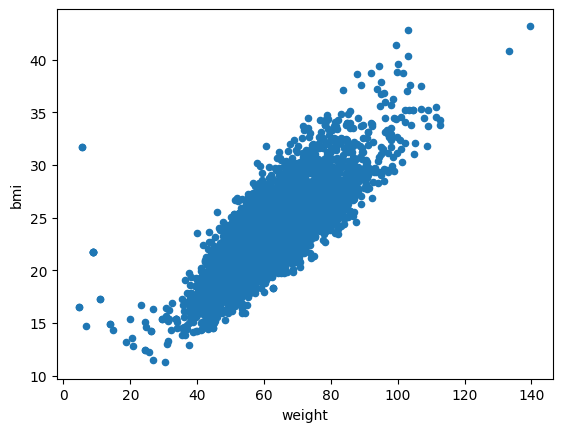

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt

bmi_stats.plot(kind='scatter', x="weight", y='bmi')
plt.show()

# --------- 단순 bmi 치수 확인 ---------

In [90]:
model = sklearn.linear_model.LinearRegression()
# 선형 모델 선택, 선형 회귀 모델
# 지도 학습으로 분류된 모델

model.fit(X, y)
# 모델 훈련

X_weight = [[int(input('몸무게를 입력하세요.'))]]

print(model.predict(X_weight))

몸무게를 입력하세요.80
[[23.64688501]]


# --------- bmi 치수 계산식 ver ---------

In [91]:
model = sklearn.linear_model.LinearRegression()
# 선형 모델 선택, 선형 회귀 모델
# 지도 학습으로 분류된 모델

model.fit(X, y)
# 모델 훈련

X_weight = int(input('몸무게를 입력하세요.'))
X_height = int(input('키를 입력하세요.'))

X_cal = [[(X_weight / ((X_height / 100) * (X_height / 100)))]]

print(model.predict(X_cal))

print('bmi 정확도 :', model.predict(X_cal) / X_cal * 100)

몸무게를 입력하세요.80
키를 입력하세요.180
[[22.74950622]]
bmi 정확도 : [[92.13550021]]


# --------- bmi 치수 계산식 (no data) ver ---------

In [92]:
model = sklearn.linear_model.LinearRegression()
# 선형 모델 선택, 선형 회귀 모델
# 지도 학습으로 분류된 모델

model.fit(X, y)
# 모델 훈련

X_weight = int(input('몸무게를 입력하세요.'))
X_height = int(input('키를 입력하세요.'))

X_cal = X_weight / ((X_height / 100) * (X_height / 100))

print(X_cal)

몸무게를 입력하세요.80
키를 입력하세요.180
24.691358024691358


# --------- bmi 치수 계산식 (나이) ver ---------

In [80]:
bmi_stats = vd[["weight", 'height', 'bmi', 'age']]
bmi_stats

,weight,height,bmi,age
0,67.50,160.2,26.3,77.0
1,54.80,167.3,19.6,54.0
2,69.70,169.1,24.4,62.0
3,53.00,160.6,20.5,74.0
4,59.70,171.0,20.4,66.0
...,...,...,...,...
6383,63.00,161.5,24.2,64.0
6384,62.30,159.3,24.6,69.0
6385,43.25,151.7,18.8,61.0
6386,55.50,155.7,22.9,24.0


In [86]:
import numpy as np

X = np.c_[bmi_stats["age"]]
y = np.c_[bmi_stats["bmi"]]

X, y

(array([[77.],
        [54.],
        [62.],
        ...,
        [61.],
        [24.],
        [47.]]),
 array([[26.3],
        [19.6],
        [24.4],
        ...,
        [18.8],
        [22.9],
        [22.9]]))

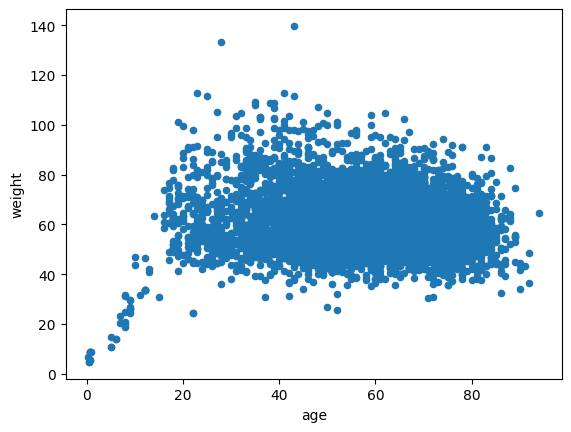

In [85]:
import matplotlib as mpl
import matplotlib.pyplot as plt

bmi_stats.plot(kind='scatter', x="age", y='weight')
plt.show()

In [94]:
model = sklearn.linear_model.LinearRegression()
# 선형 모델 선택, 선형 회귀 모델
# 지도 학습으로 분류된 모델

model.fit(X, y)
# 모델 훈련

X_age = [[int(input('나이를 입력하세요.'))]]
confirm_int = int(input('본인의 bmi 치수를 입력하세요.'))

print(model.predict(X_age))

print('bmi 정확도 :', model.predict(X_age) / confirm_int * 100)

나이를 입력하세요.27
본인의 bmi 치수를 입력하세요.20
[[22.78696378]]
bmi 정확도 : [[113.93481888]]


# bmi 끝

In [96]:
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

vd = df_cases
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6388 entries, 0 to 6387
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseid               6388 non-null   int64  
 1   subjectid            6388 non-null   int64  
 2   casestart            6388 non-null   int64  
 3   caseend              6388 non-null   int64  
 4   anestart             6388 non-null   int64  
 5   aneend               6388 non-null   float64
 6   opstart              6388 non-null   int64  
 7   opend                6388 non-null   int64  
 8   adm                  6388 non-null   int64  
 9   dis                  6388 non-null   int64  
 10  icu_days             6388 non-null   int64  
 11  death_inhosp         6388 non-null   int64  
 12  age                  6388 non-null   float64
 13  sex                  6388 non-null   object 
 14  height               6388 non-null   float64
 15  weight               6388 non-null   f

In [102]:
vd_ex1 = df_cases[['age','sex','death_inhosp', 'asa']]
vd_ex1.sample(30)

,age,sex,death_inhosp,asa
5711,70.0,F,0,2.0
5766,69.0,F,0,3.0
1778,61.0,M,0,2.0
5999,60.0,M,0,2.0
1546,22.0,M,0,2.0
4438,70.0,M,0,2.0
5408,69.0,F,0,2.0
1360,60.0,M,0,2.0
1541,45.0,F,0,2.0
2253,51.0,F,0,1.0
